# Smoothen Stock Price
Write a function named `smoothen_price`. Given the historical stock price data (represented by a 1D numpy array) and a window size (an integer) as inputs, the function smoothens the stock price using a moving average filter. You can use the simple moving average filter. The function should plot the original stock price and smoothened stock price. Make sure your plot is clearly labeled. Do not use the built-in moving average filters. 

Test your function using the opening price of Tesla from "TSLA.csv" and window size 100. Here is the expected output:
![TSLA](assets/output.png)


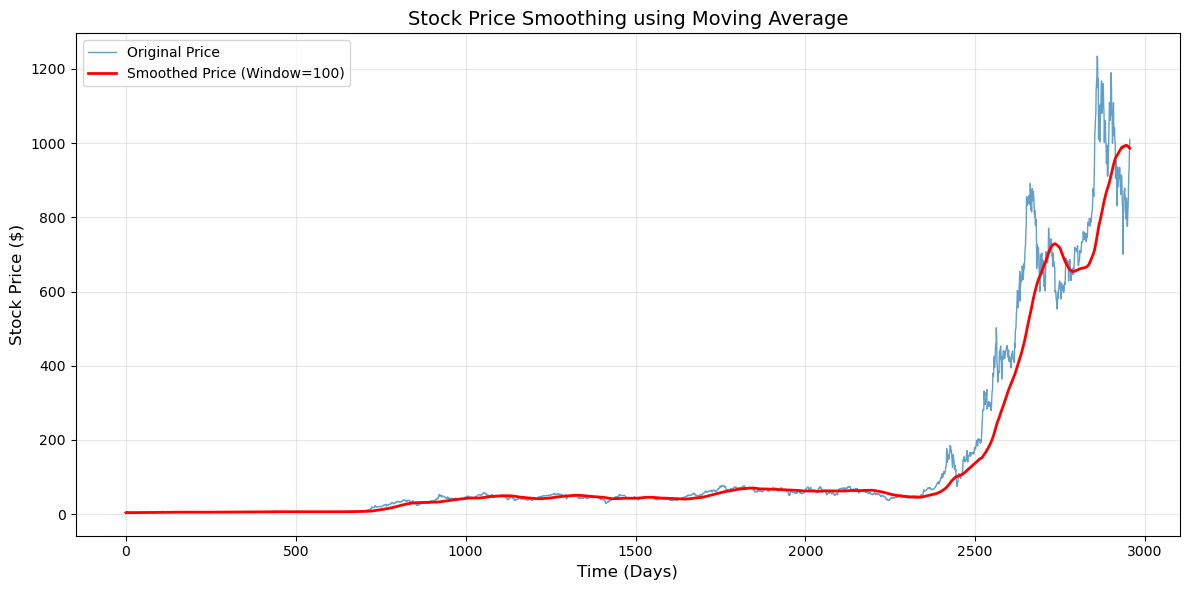

Original data length: 2956
Smoothed data length: 2956
First 5 original prices: [3.8   5.158 5.    4.6   4.   ]
First 5 smoothed prices: [3.8        4.479      4.65266667 4.6395     4.5116    ]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def smoothen_price(price_data, window_size):
    """
    Smoothens stock price data using a simple moving average filter.
    
    Parameters:
    price_data: 1D numpy array of stock prices
    window_size: integer, the size of the moving average window
    
    Returns:
    smoothed_data: 1D numpy array of smoothed prices
    """
    
    # Get the length of the price data
    n = len(price_data)
    
    # Create an array to store the smoothed prices
    smoothed_data = np.zeros(n)
    
    # Calculate the moving average for each position
    for i in range(n):

        # Determine the start of the window
        start = max(0, i - window_size + 1)
        
        # Calculate the average of values in the window
        smoothed_data[i] = np.mean(price_data[start:i+1])
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    # Plot original price
    plt.plot(price_data, label='Original Price', linewidth=1, alpha=0.7)
    
    # Plot smoothed price
    plt.plot(smoothed_data, label=f'Smoothed Price (Window={window_size})', linewidth=2, color='red')
    
    # Add labels and title
    plt.xlabel('Time (Days)', fontsize=12)
    plt.ylabel('Stock Price ($)', fontsize=12)
    plt.title('Stock Price Smoothing using Moving Average', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # Display the plot
    plt.tight_layout()
    plt.show()
    
    return smoothed_data


# Test the function with Tesla data
if __name__ == "__main__":

    # Read the CSV file
    df = pd.read_csv('TSLA.csv')
    
    # Get the opening price as a numpy array
    opening_price = df['Open'].values
    
    # Apply the smoothing function with window size 100
    smoothed_price = smoothen_price(opening_price, window_size=100)
    
    print(f"Original data length: {len(opening_price)}")
    print(f"Smoothed data length: {len(smoothed_price)}")
    print(f"First 5 original prices: {opening_price[:5]}")
    print(f"First 5 smoothed prices: {smoothed_price[:5]}")

# Linear Regression

Write a program to accomplish the following goals:

- Load the "penguins.csv" data. 
- Remove all rows containing empty fields. 
- Fit a linear model to predict how body mass (dependent variable) of penguins is correlated to flipper length (independent variable).
- Print out the mean squared error and $R^2$ value.
Choose the appropriate plot to compare the actual body mass and the predicted body mass. Clearly label your plot.

LINEAR REGRESSION RESULTS
Slope (coefficient): 50.1533
Intercept: -5872.0927
Mean Squared Error (MSE): 153789.6779
R² Score: 0.7621


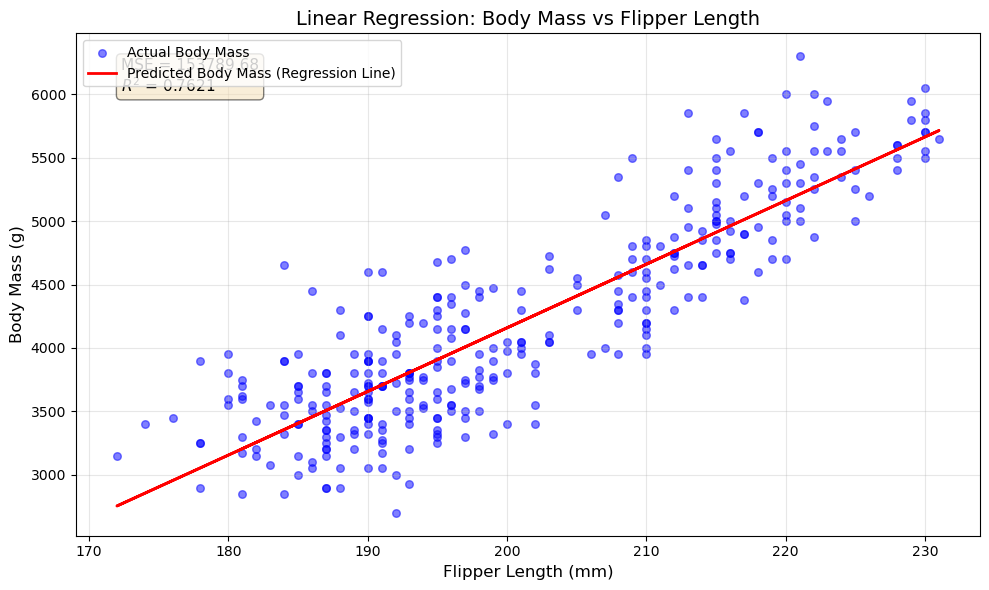

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = pd.read_csv('penguins.csv')

# Remove all rows containing empty fields
df_clean = df.dropna()

# Extract the independent variable (flipper length) and dependent variable (body mass)
X = df_clean['flipper_length_mm'].values.reshape(-1, 1)  # Need to reshape for sklearn
y = df_clean['body_mass_g'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the results
print("LINEAR REGRESSION RESULTS")
print(f"Slope (coefficient): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Scatter plot with the regression line
plt.figure(figsize=(10, 6))

# Scatter plot of actual data
plt.scatter(X, y, alpha=0.5, label='Actual Body Mass', color='blue', s=30)

# Plot the regression line
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicted Body Mass (Regression Line)')

# Labels and title
plt.xlabel('Flipper Length (mm)', fontsize=12)
plt.ylabel('Body Mass (g)', fontsize=12)
plt.title('Linear Regression: Body Mass vs Flipper Length', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Add text box with metrics
textstr = f'MSE = {mse:.2f}\n$R^2$ = {r2:.4f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=11, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


# Logistic Regression

We have discussed linear regression in class. In this problem, you will explore logistic regression. Specifically, you will preprocess the dataset using pandas for logistic regression. Different from linear regression, logistic regression considers binary dependent variables rather than continuous dependent variables. Logistic regression is widely-used to predict binary outcomes based on a set of features (independent variables). 

Write a program to accomplish the following:

- Load the "diabetes.csv" file using pandas.
- Extract the following columns as your independent variables: Glucose, BloodPressure, and BMI. Extract the top 75% rows as the features in training dataset named feature_train. For practice purpose, **do not use** the built-in dataset splitting function in this problem. In your future projects, you can use `train_test_split` from `sklearn.model_selection` to automatically split the dataset for you. 
- Extract the "Outcome" column as the dependent variable. Extract the top 75% rows as the labels in the training dataset, named outcome_train.  For practice purpose, do not use the built-in dataset splitting function in this problem.
- Keep the rest of data as your testing dataset. Let's name the features in testing dataset as `feature_test`
- Instantiate a logistic regression model named `logreg`. Fit the model using your training dataset. You can use the following code snippet:
    ```py
    logreg = LogisticRegression()
    logreg.fit(feature_train, outcome_train)
    ```

- Let's evaluate the quality of prediction. Test the learned model using `outcome_pred = logreg.predict(feature_test)`
Compare `outcome_pred` with the actual outcome in testing dataset, count the percentage of positive patients that are correctly predicted by your model. For practice purpose, do not use the built-in report/summary or confusion matrix for calculation. 
- Print out the false negative and false positive of your model. For practice purpose, do not use the built-in report/summary or confusion matrix for calculation. 

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# Load the data
print("Loading diabetes.csv...")
df = pd.read_csv('diabetes.csv')

# Print dataset info for verification
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
print(df.head())

# Get independent variables (features)
features = df[['Glucose', 'BloodPressure', 'BMI']]
print(f"\nFeatures shape: {features.shape}")

# Get dependent variable (outcome)
outcome = df['Outcome']
print(f"Outcome shape: {outcome.shape}")

# Calculate the split point for 75% training data
total_rows = len(df)
split_point = int(total_rows * 0.75)

print(f"\nTotal rows: {total_rows}")
print(f"Training rows (75%): {split_point}")
print(f"Testing rows (25%): {total_rows - split_point}")

# Split the data manually
feature_train = features.iloc[:split_point]
outcome_train = outcome.iloc[:split_point]

feature_test = features.iloc[split_point:]
outcome_test = outcome.iloc[split_point:]

print(f"\nTraining set size: {len(feature_train)}")
print(f"Testing set size: {len(feature_test)}")

# Start and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(feature_train, outcome_train)

print("Model training complete!")

# Make predictions on the test set
outcome_pred = logreg.predict(feature_test)
print("MODEL EVALUATION")

# Manual calculation of metrics
# Convert to numpy arrays for easier manipulation
actual = outcome_test.values
predicted = outcome_pred

# Count true positives, false positives, true negatives, false negatives
true_positive = 0
false_positive = 0
true_negative = 0
false_negative = 0

for i in range(len(actual)):
    if actual[i] == 1 and predicted[i] == 1:
        true_positive += 1
    elif actual[i] == 0 and predicted[i] == 1:
        false_positive += 1
    elif actual[i] == 0 and predicted[i] == 0:
        true_negative += 1
    elif actual[i] == 1 and predicted[i] == 0:
        false_negative += 1

print(f"\nConfusion Matrix Breakdown:")
print(f"True Positives (TP): {true_positive}")
print(f"False Positives (FP): {false_positive}")
print(f"True Negatives (TN): {true_negative}")
print(f"False Negatives (FN): {false_negative}")

# Calculate the percentage of positive patients correctly predicted
total_positive_patients = true_positive + false_negative

if total_positive_patients > 0:
    percentage_correct_positive = (true_positive / total_positive_patients) * 100
else:
    percentage_correct_positive = 0


print(f"Total positive patients in test set: {total_positive_patients}")
print(f"Correctly predicted positive patients: {true_positive}")
print(f"Percentage of positive patients correctly predicted: {percentage_correct_positive:.2f}%")

# Print false negative and false positive
print(f"\nFalse Negative: {false_negative}")
print(f"False Positive: {false_positive}")

# Additional useful metrics
accuracy = (true_positive + true_negative) / len(actual) * 100
print(f"\nOverall Accuracy: {accuracy:.2f}%")

# Explanation
print("EXPLANATION")
print("False Negative (FN): Patients who actually have diabetes (1) but")
print("                     were predicted as not having diabetes (0)")
print("False Positive (FP): Patients who don't have diabetes (0) but")
print("                     were predicted as having diabetes (1)")

# Show some example predictions
print(f"\nSample predictions (first 10):")
print(f"Actual:    {actual[:10]}")
print(f"Predicted: {predicted[:10]}")

Loading diabetes.csv...
Dataset shape: (768, 9)
Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

First few rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Features shape: (768, 3)
Outcome shape: (768,)

Total rows: 768
Training rows (75%): 576
Testing rows (